## Gerando pontos experimentais ##

Vamos testar o comportamento do ajuste para a função de Himelblau:

$$y = (x2 + x - 11)2 + (x2 + x - 7)^2$$  

Primeiramente, foram gerados 500 pontos de treinamento utilizando a amostragem de Halton.  

Os pontos gerados são avaliados na função de Himelblau e posteriormente alimentados na biblioteca Kriging, onde o ajuste já é realizado.


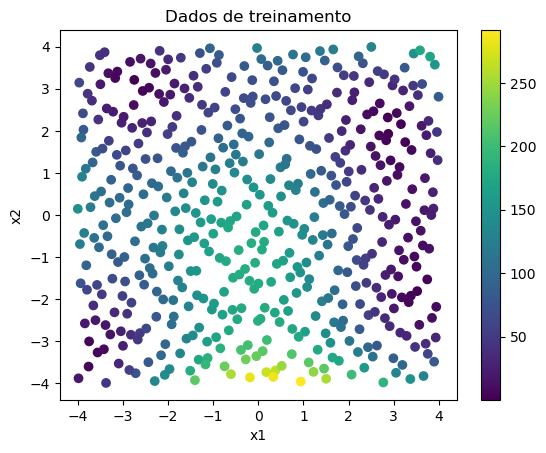

In [1]:
import Kriging as kg
from scipy.stats import qmc
import matplotlib.pyplot as plt
import numpy as np

# Himelblau function
def func(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[1]**2 + x[0] - 7)**2

# Gerando dados de treinamento (500 pontos usando amostragem de Halton)
sampler = qmc.Halton(d=2, scramble=True)
x_train = sampler.random(n=500) * 8 - 4  # Pontos de entrada (bidimensionais) entre -6 e 6
z_train = [func(x) for x in x_train]  # Pontos de saída (valores da função)

# Treinando o modelo de kriging
kriging_model = kg.Kriging(x_train, z_train, model='gaussian')

# Apresentando os dados de treinamento
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=z_train, cmap='viridis')
plt.colorbar()
plt.title('Dados de treinamento')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Testando o ajuste ##

20 pontos são gerados dentro da região para qual o modelo kriging foi ajustado, na finalidade avaliar o ajuste.  

A diferença entre os valores reais e os valores preditos são mostrados na tabela, junto com o conjunto dos dados de teste.

In [2]:
import pandas as pd

x_pred = sampler.random(n=20) * 8 - 4  # Pontos de entrada (bidimensionais) entre -6 e 6
y_pred = kriging_model.predict(x_pred)  # Predição dos valores de saída
y_real = [func(x) for x in x_pred]

# Criando um DataFrame com os valores reais e preditos
df_diff = pd.DataFrame({
    'x1': x_pred[:, 0],
    'x2': x_pred[:, 1],
    'y_real': y_real,
    'y_pred': y_pred,
    'difference': np.array(y_real) - y_pred
})

# Exibindo a tabela
display(df_diff)

,x1,x2,y_real,y_pred,difference
0,3.472890,-2.085650,1.727018,1.726670,3.480188e-04
1,-3.027110,0.581017,95.463487,95.463445,4.139685e-05
2,0.972890,3.247683,66.752374,66.752356,1.807078e-05
3,-1.027110,-2.678243,160.076943,160.077026,-8.349966e-05
4,2.972890,-0.011576,20.940630,20.940545,8.504571e-05
5,-2.027110,2.655091,21.852373,21.852330,4.296978e-05
6,1.972890,-3.270835,139.877186,139.877182,3.945847e-06
7,-0.027110,-0.604169,179.023115,179.023012,1.031472e-04
8,3.972890,2.062498,48.377601,48.377919,-3.178067e-04
9,-3.980235,-1.789354,69.824532,69.824601,-6.903283e-05


## Apresentando os resultados graficamente ##

A figura em 3D apresenta os marcadores 'o' com os pontos de treinamento e os marcadores 'x' com os pontos de texte.  
Podemos observar o comportamento muito condizente com o esperado para os pontos preditos.

In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=x_train[:, 0], y=x_train[:, 1], z=z_train,
    mode='markers',
    marker=dict(size=5, color=z_train, colorscale='Viridis', opacity=0.8),
    name='Pontos de treinamento'
), go.Scatter3d(
    x=x_pred[:, 0], y=x_pred[:, 1], z=y_pred,
    mode='markers',
    marker=dict(size=2, color='red', opacity=0.8, symbol='x'),
    name='Previsões'
)])

fig.update_layout(
    title='Dados de treinamento e previsões em 3D',
    scene=dict(
        xaxis_title='x1',
        yaxis_title='x2',
        zaxis_title='z'
    ),
    width=800,  # Largura da imagem
    height=800   # Altura da imagem
)

fig.show()

In [4]:
print('C0', kriging_model.C0)
print('C', kriging_model.C)
print('alpha', kriging_model.alpha)

C0 -0.35516049327226895
C 9.487331772053144
alpha 3.8244954327090532
